# Exploratory Data Analysis

In [1]:
#import packages
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import impute


In [2]:
BASE_DIR = "/Users/Avinash/Documents/Kanchanah/Springboard/Data_Science_Track/Capstone_Two_Other_Material/"

data = "Data/data.csv"

## Import Dataset

In [3]:
data = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, data)))


In [4]:
#Dimension and first few few columns of X_train
data.shape

(200564, 53)

In [5]:
#review first few rows
data.head()

,Unnamed: 0,HOUSEID,PERSONID,VEHID,CAR,CARSHARE,CAR_label,DRVRCNT,EDUC,EDUC_label,...,VEHOWNMO,WKFTPT,WKFTPT_label,WKRMHM,WKRMHM_label,WRKCOUNT,YEARMILE,YOUNGCHILD,fueltype_numeric,fueltype_numeric_label
0,49977,30210010,2,3,1.0,0.0,DAILY,3.0,3.0,SOME COLLEGE OR ASSOCIATES DEGREE,...,0.0,1.0,FULL-TIME,2.0,NO,3.0,25000.0,0.0,0,Non-EV
1,152617,40136586,1,1,1.0,0.0,DAILY,1.0,3.0,SOME COLLEGE OR ASSOCIATES DEGREE,...,NaN,NaN,NaN,NaN,NaN,0.0,1000.0,0.0,0,Non-EV
2,219521,40588561,4,4,1.0,0.0,DAILY,3.0,2.0,HIGH SCHOOL GRADUATE OR GED,...,NaN,2.0,PART-TIME,2.0,NO,2.0,5000.0,0.0,0,Non-EV
3,207962,40509371,1,1,3.0,10.0,A FEW TIMES A MONTH,1.0,4.0,BACHELOR'S DEGREE,...,3.0,1.0,FULL-TIME,NaN,NaN,1.0,500.0,0.0,0,Non-EV
4,108057,30455166,1,2,1.0,0.0,DAILY,2.0,5.0,GRADUATE DEGREE OR PROFESSIONAL DEGREE,...,NaN,NaN,NaN,NaN,NaN,2.0,10000.0,0.0,0,Non-EV


In [6]:
#remove first column
data = data.iloc[:,1:]

In [7]:
#Dimension and first few few columns of X_train
data.shape

(200564, 52)

In [8]:
#look at first few rows
data.head()

,HOUSEID,PERSONID,VEHID,CAR,CARSHARE,CAR_label,DRVRCNT,EDUC,EDUC_label,GT1JBLWK,...,VEHOWNMO,WKFTPT,WKFTPT_label,WKRMHM,WKRMHM_label,WRKCOUNT,YEARMILE,YOUNGCHILD,fueltype_numeric,fueltype_numeric_label
0,30210010,2,3,1.0,0.0,DAILY,3.0,3.0,SOME COLLEGE OR ASSOCIATES DEGREE,2.0,...,0.0,1.0,FULL-TIME,2.0,NO,3.0,25000.0,0.0,0,Non-EV
1,40136586,1,1,1.0,0.0,DAILY,1.0,3.0,SOME COLLEGE OR ASSOCIATES DEGREE,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1000.0,0.0,0,Non-EV
2,40588561,4,4,1.0,0.0,DAILY,3.0,2.0,HIGH SCHOOL GRADUATE OR GED,2.0,...,NaN,2.0,PART-TIME,2.0,NO,2.0,5000.0,0.0,0,Non-EV
3,40509371,1,1,3.0,10.0,A FEW TIMES A MONTH,1.0,4.0,BACHELOR'S DEGREE,2.0,...,3.0,1.0,FULL-TIME,NaN,NaN,1.0,500.0,0.0,0,Non-EV
4,30455166,1,2,1.0,0.0,DAILY,2.0,5.0,GRADUATE DEGREE OR PROFESSIONAL DEGREE,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,10000.0,0.0,0,Non-EV


In [9]:
#Look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200564 entries, 0 to 200563
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOUSEID                 200564 non-null  int64  
 1   PERSONID                200564 non-null  int64  
 2   VEHID                   200564 non-null  int64  
 3   CAR                     198663 non-null  float64
 4   CARSHARE                200271 non-null  float64
 5   CAR_label               198663 non-null  object 
 6   DRVRCNT                 200564 non-null  float64
 7   EDUC                    200424 non-null  float64
 8   EDUC_label              200424 non-null  object 
 9   GT1JBLWK                114467 non-null  float64
 10  GT1JBLWK_label          114467 non-null  object 
 11  HBHUR                   200392 non-null  object 
 12  HBHUR_label             200392 non-null  object 
 13  HBPPOPDN                200392 non-null  float64
 14  HBPPOPDN_label      

## Descriptives

In [10]:
#review statistics
data.iloc[:,3:30].describe()

,CAR,CARSHARE,DRVRCNT,EDUC,GT1JBLWK,HBPPOPDN,HBRESDN,HHFAMINC,HHSIZE,HHVEHCNT,HOMEOWN,OCCAT,PLACE,PRICE
count,198663.000000,200271.000000,200564.000000,200424.000000,114467.000000,200392.000000,200392.000000,194349.000000,200564.000000,200564.000000,200522.000000,114419.000000,196881.000000,199877.000000
mean,1.171491,0.014311,2.003824,3.452476,1.901570,3586.123698,1621.837948,6.543939,2.461902,2.381689,1.762814,3.128807,2.900458,2.823141
std,0.459593,0.389538,0.782972,1.129053,0.297897,4834.198367,2830.401017,2.495162,1.235194,1.190579,7.512761,3.733819,1.049814,1.272711
min,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,3.000000,2.000000,300.000000,300.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,1.000000,0.000000,2.000000,3.000000,2.000000,1500.000000,750.000000,6.000000,2.000000,2.000000,1.000000,4.000000,3.000000,3.000000
75%,1.000000,0.000000,2.000000,4.000000,2.000000,7000.000000,1500.000000,8.000000,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000
max,5.000000,79.000000,9.000000,5.000000,2.000000,30000.000000,30000.000000,11.000000,13.000000,12.000000,97.000000,97.000000,5.000000,5.000000


Taking a look at some variables.
1. Many people seems to be own houses.
2. Education seems to be pretty well distributed, with people attending college having the highest frequency
3. Household income seems to be about \\$50000\. There are people earning up to \\$200000\.

In [11]:

#review statistics
data.iloc[:,30:55].describe()

,R_AGE,R_HISP,R_RACE,R_SEX,TIMETOWK,VEHAGE,VEHOWNED,VEHOWNMO,WKFTPT,WKRMHM,WRKCOUNT,YEARMILE,YOUNGCHILD,fueltype_numeric
count,200269.000000,200281.000000,199564.000000,200442.000000,98932.000000,199483.000000,200405.000000,30822.000000,114404.000000,99042.000000,200564.000000,147843.000000,200564.000000,200564.000000
mean,53.584254,1.925005,3.157493,1.516364,26.190171,8.437155,1.155490,5.327234,1.204127,1.825508,1.230959,12082.250435,0.108205,0.029472
std,17.218933,0.263383,13.247733,0.499733,27.274438,5.940635,0.362372,3.249035,0.403064,0.379534,0.982604,12076.641896,0.389822,0.169126
min,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,2.000000,1.000000,1.000000,12.000000,4.000000,1.000000,3.000000,1.000000,2.000000,0.000000,5000.000000,0.000000,0.000000
50%,56.000000,2.000000,1.000000,2.000000,20.000000,7.000000,1.000000,5.000000,1.000000,2.000000,1.000000,10000.000000,0.000000,0.000000
75%,67.000000,2.000000,1.000000,2.000000,30.000000,12.000000,1.000000,8.000000,1.000000,2.000000,2.000000,15000.000000,0.000000,0.000000
max,92.000000,2.000000,97.000000,2.000000,600.000000,40.000000,2.000000,11.000000,2.000000,2.000000,7.000000,200000.000000,5.000000,1.000000



1. It looks like the fuel type is highly imbalanced. Should we do something about this?

In [12]:
#Other categrical variables
data['HBHUR'].value_counts()

R    48635
T    47063
S    46503
C    37573
U    20618
Name: HBHUR, dtype: int64

In [13]:
#Should we do something to make less categories
data['HHSTATE_label'].value_counts()

CO    40461
UT    38988
OH    25139
WV    18412
ND    13622
HI    13198
SD    10756
CA     4455
ID     4353
ME     2282
GA     2155
OR     1976
RI     1609
OK     1561
IN     1494
MN     1225
VT     1130
MO     1014
WI     1010
NM      851
KS      794
CT      741
MS      741
TX      708
MD      706
PA      600
WA      596
VA      553
IL      541
NC      534
AR      503
TN      501
MI      495
LA      481
NE      466
NH      465
NJ      448
AK      446
KY      424
FL      414
IA      403
DC      386
SC      364
NV      363
AL      346
WY      341
MA      336
MT      309
AZ      307
NY      302
DE      259
Name: HHSTATE_label, dtype: int64

## Visualization

### Categorical Variables (Ordinal and Nominal)

In [14]:
#nominal variables
nominal = ["GT1JBLWK_label","HBHUR_label",
"HOMEOWN_label",
"OCCAT_label",
"R_HISP_label",
"R_RACE_label",
"R_SEX_label",
"VEHOWNED_label",
"WKFTPT_label",
"WKRMHM_label"]

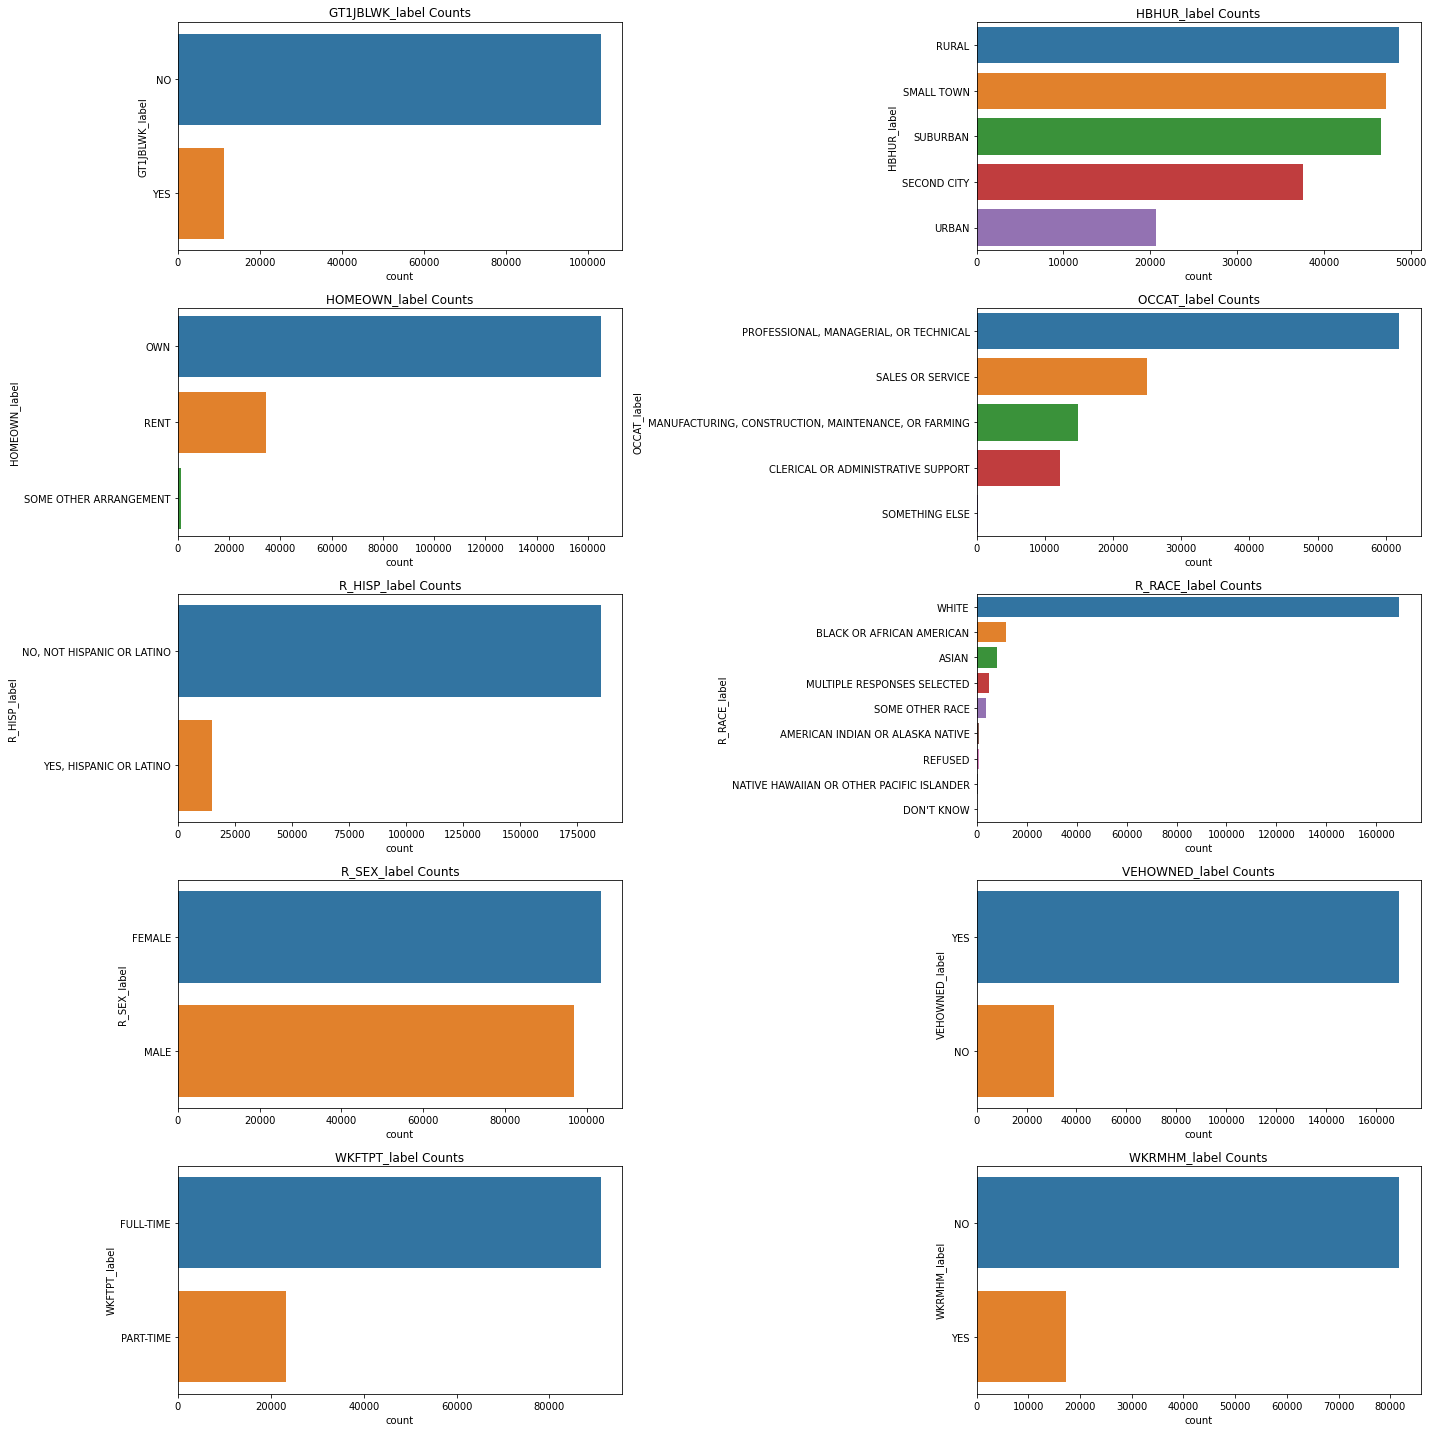

In [15]:
#Do nominal variables first

fig, axes =plt.subplots(5,2, figsize=(20,20))
axes = axes.flatten()
#object_bol = data.dtypes == 'object'
for ax, catplot in zip(axes, nominal):
    sns.countplot(y=catplot, data=data, ax=ax, order = data[catplot].value_counts().index)
    ax.set_title(catplot+" Counts")

plt.tight_layout()  
plt.show()


Many of these reaffirm what we saw in the descriptives.

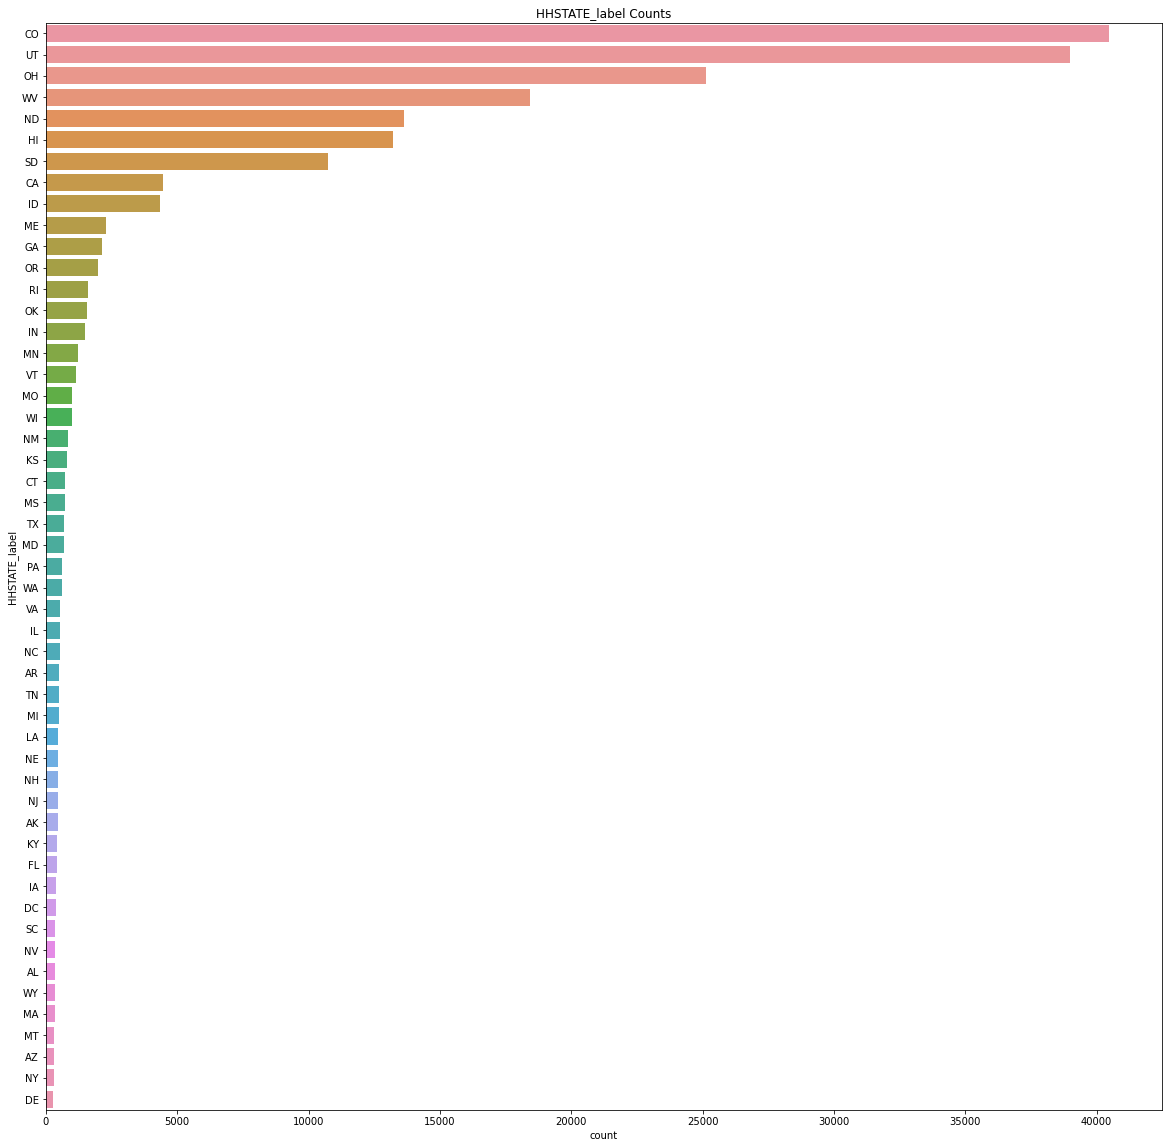

In [16]:

# Work on HHSTATE_label variable separately

plt.figure(figsize=(20,20))
sns.countplot(y="HHSTATE_label", data=data, order = data['HHSTATE_label'].value_counts().index)
plt.title("HHSTATE_label"+" Counts")
 
plt.show()

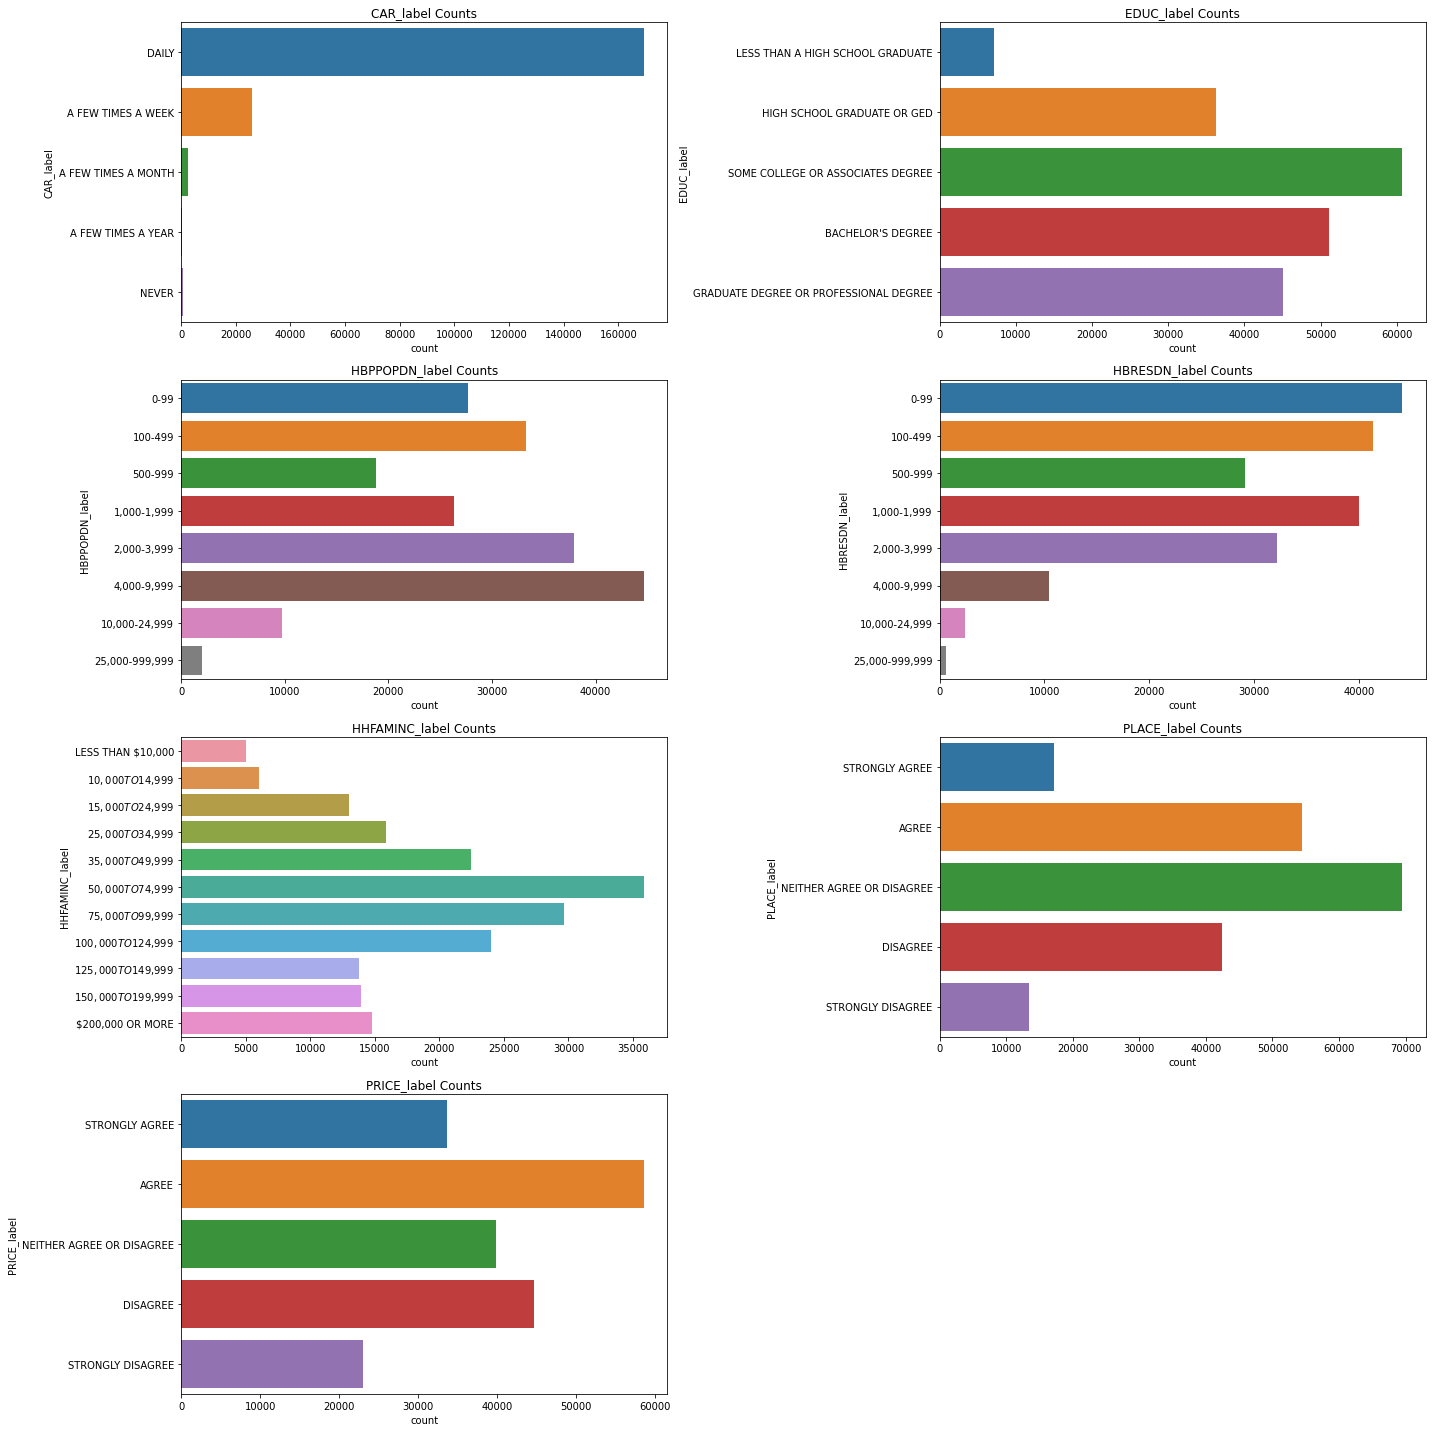

In [17]:
#Ordinal variables with labels

ord_label = ["CAR_label",
"EDUC_label",
"HBPPOPDN_label",
"HBRESDN_label",
"HHFAMINC_label",
"PLACE_label",
"PRICE_label"]

fig, axes =plt.subplots(4,2, figsize=(20,20))

fig.delaxes(axes[3, 1])
axes = axes.flatten()
for ax, catplot in zip(axes, ord_label):
    l = catplot.replace('_label','')
    ordm = list(data[catplot].groupby(data[l]).unique().apply(pd.Series)[0])
    sns.countplot(y=catplot, data=data, ax=ax, order = ordm)
    ax.set_title(catplot+" Counts")

plt.tight_layout()  
plt.show()



Many of these are skewed but whether they are skewed or not does not matter since we are not planning to perform Linear Regression.
The number of categories seem fine to work with, except for State.

One thing to note is that the response variable, fueltype, is extremely imbalanced. How to solve this?

In [18]:
Num_col = ['CARSHARE','HOMEOWN','R_AGE','TIMETOWK','VEHAGE','WRKCOUNT','YEARMILE','YOUNGCHILD']

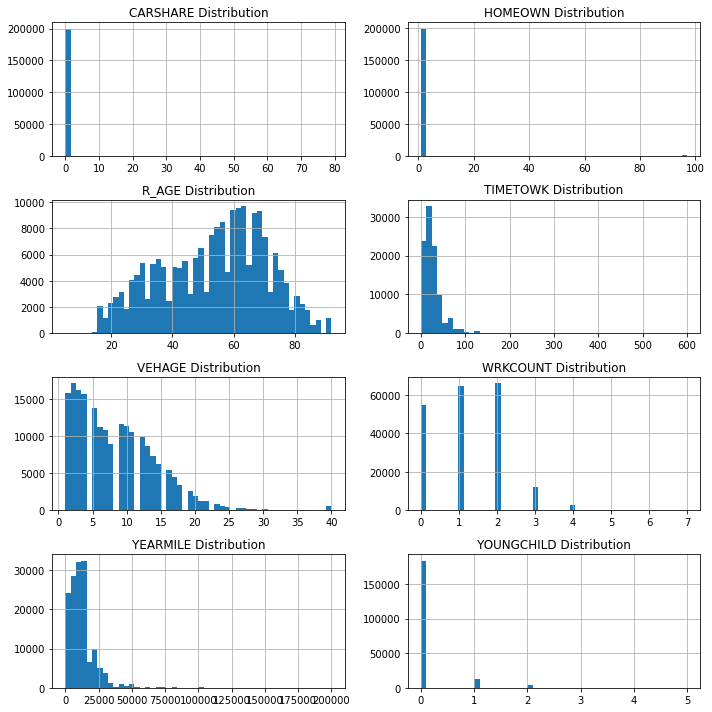

In [19]:
fig=plt.figure(figsize=(10, 10))
for i, var_name in enumerate(Num_col):
    ax=fig.add_subplot(4,2,i+1)
    data[var_name].hist(bins=50,ax=ax)
    ax.set_title(var_name+" Distribution")
fig.tight_layout() 
plt.show()


Some of these variables are zero inflated. Let's look at some of the variables removing the zero.

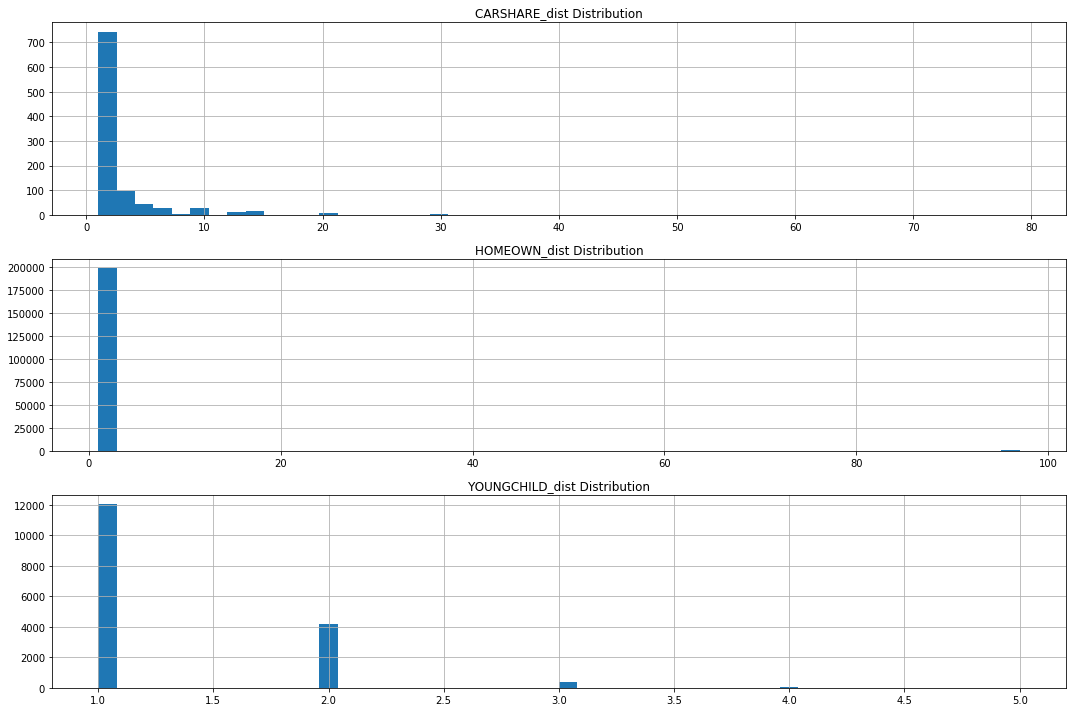

In [20]:
data['CARSHARE_dist'] = data['CARSHARE'].replace(0,np.nan)
data['HOMEOWN_dist'] = data['HOMEOWN'].replace(0,np.nan)
data['YOUNGCHILD_dist'] = data['YOUNGCHILD'].replace(0,np.nan)

zero_inflated = ['CARSHARE_dist','HOMEOWN_dist','YOUNGCHILD_dist']

fig=plt.figure(figsize=(15, 10))
for i, var_name in enumerate(zero_inflated):
    ax=fig.add_subplot(3,1,i+1)
    data[var_name].hist(bins=50,ax=ax)
    ax.set_title(var_name+" Distribution")
fig.tight_layout() 
plt.show()

These variables need to be transformed. After splitting dataset int train and test datasets, do min max scaling on the train datasets and apply it to the test dataset.

In [21]:
data.drop(columns=zero_inflated, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200564 entries, 0 to 200563
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOUSEID                 200564 non-null  int64  
 1   PERSONID                200564 non-null  int64  
 2   VEHID                   200564 non-null  int64  
 3   CAR                     198663 non-null  float64
 4   CARSHARE                200271 non-null  float64
 5   CAR_label               198663 non-null  object 
 6   DRVRCNT                 200564 non-null  float64
 7   EDUC                    200424 non-null  float64
 8   EDUC_label              200424 non-null  object 
 9   GT1JBLWK                114467 non-null  float64
 10  GT1JBLWK_label          114467 non-null  object 
 11  HBHUR                   200392 non-null  object 
 12  HBHUR_label             200392 non-null  object 
 13  HBPPOPDN                200392 non-null  float64
 14  HBPPOPDN_label      

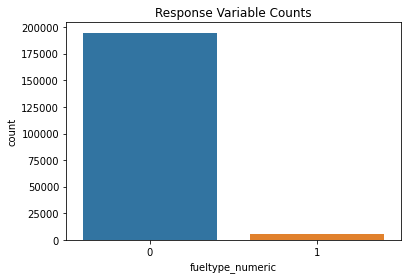

In [22]:
#Resp var counts
sns.countplot(x='fueltype_numeric', data=data)
plt.title("Response Variable Counts")
plt.show()

In [23]:
#data.shape[0] * 
sum(data['fueltype_numeric']==1) /data.shape[0]

0.02947188927225225

### Heatmap

In [24]:
nominal_lab = [a.replace("_label","") for a in nominal]

drop_var = ['HOUSEID','PERSONID','VEHID','fueltype_numeric'] + nominal_lab

data_drop = data.drop(columns = drop_var)

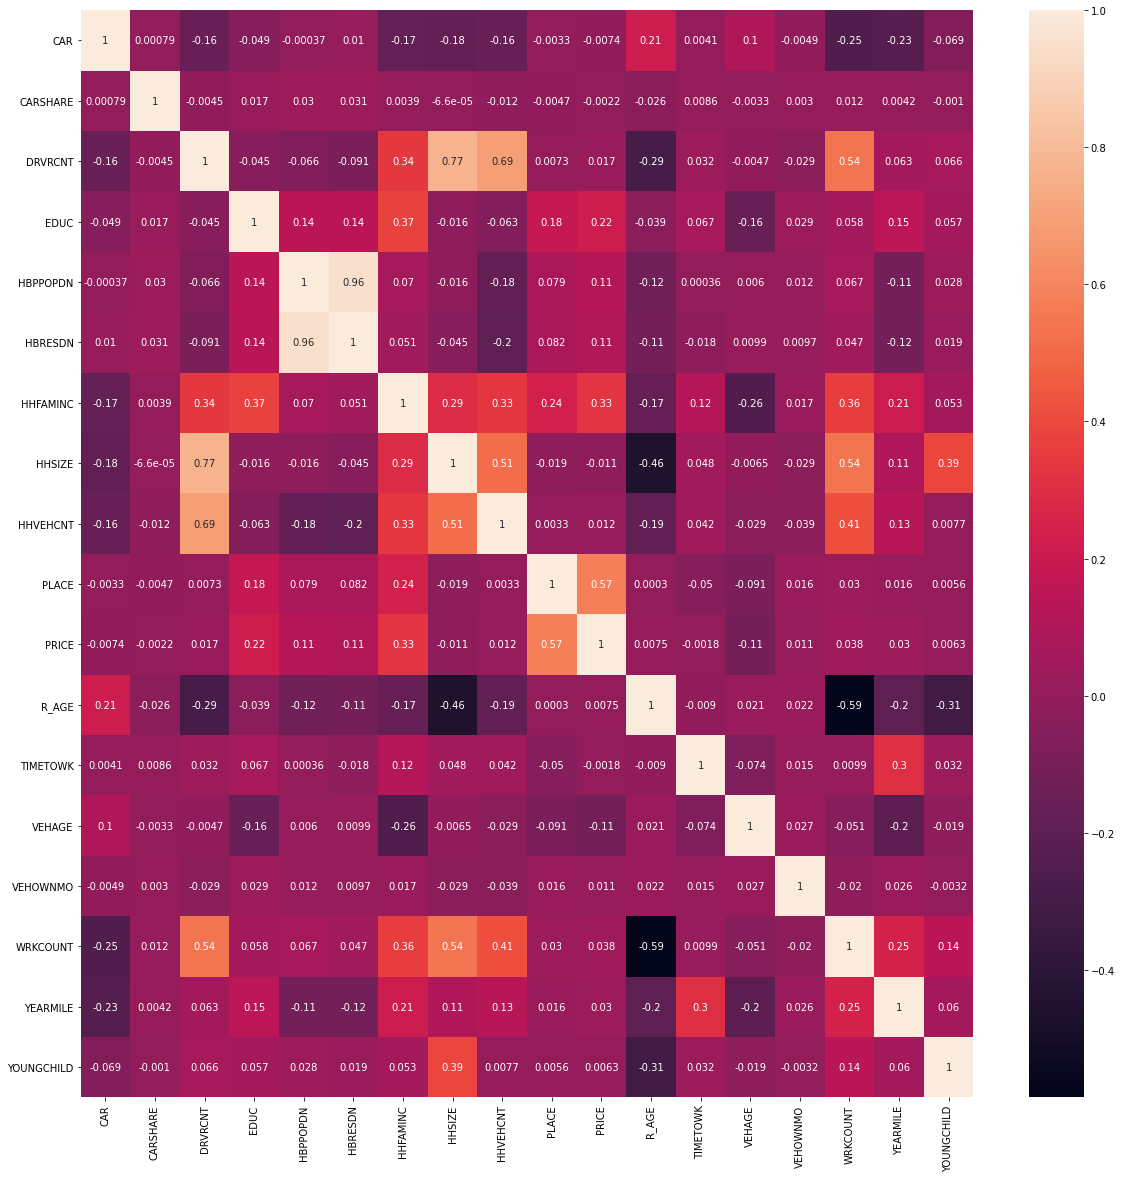

In [25]:
#Should I remove the nominal variables? I think it makes sense to do so.
#What to do about NAs?
plt.subplots(figsize=(20,20))
sns.heatmap(data_drop.corr(method = 'spearman'),annot=True);

Many variables seem to be correlated either positively or negatively

1. HBPPOPDN and HBRESDN - category of population density and category of housing units are positively correlated. This makes sense as as one increase, we would expect the other to increase as well
2. HHSIZE and DRVRCNT - As the count of household members increase, we would expect drivers to increase as well
3. WRKCOUNT and DRVRCNT - As the count of workers in the house increase, we would expect drivers to increase as well
4. R_AGE and YOUNGCHILD - These are negatively correlated. As the number of young children increases, we could expect the age groups of people to decrease. This could of course be negatively correlated the other way round as well.
5. WRKCOUNT and R_AGE - The number of workes and ages of people in a household are negatively correlated.
6. R_AGE and HHSIZE - The number of people in a a household are negatively correlated with age.

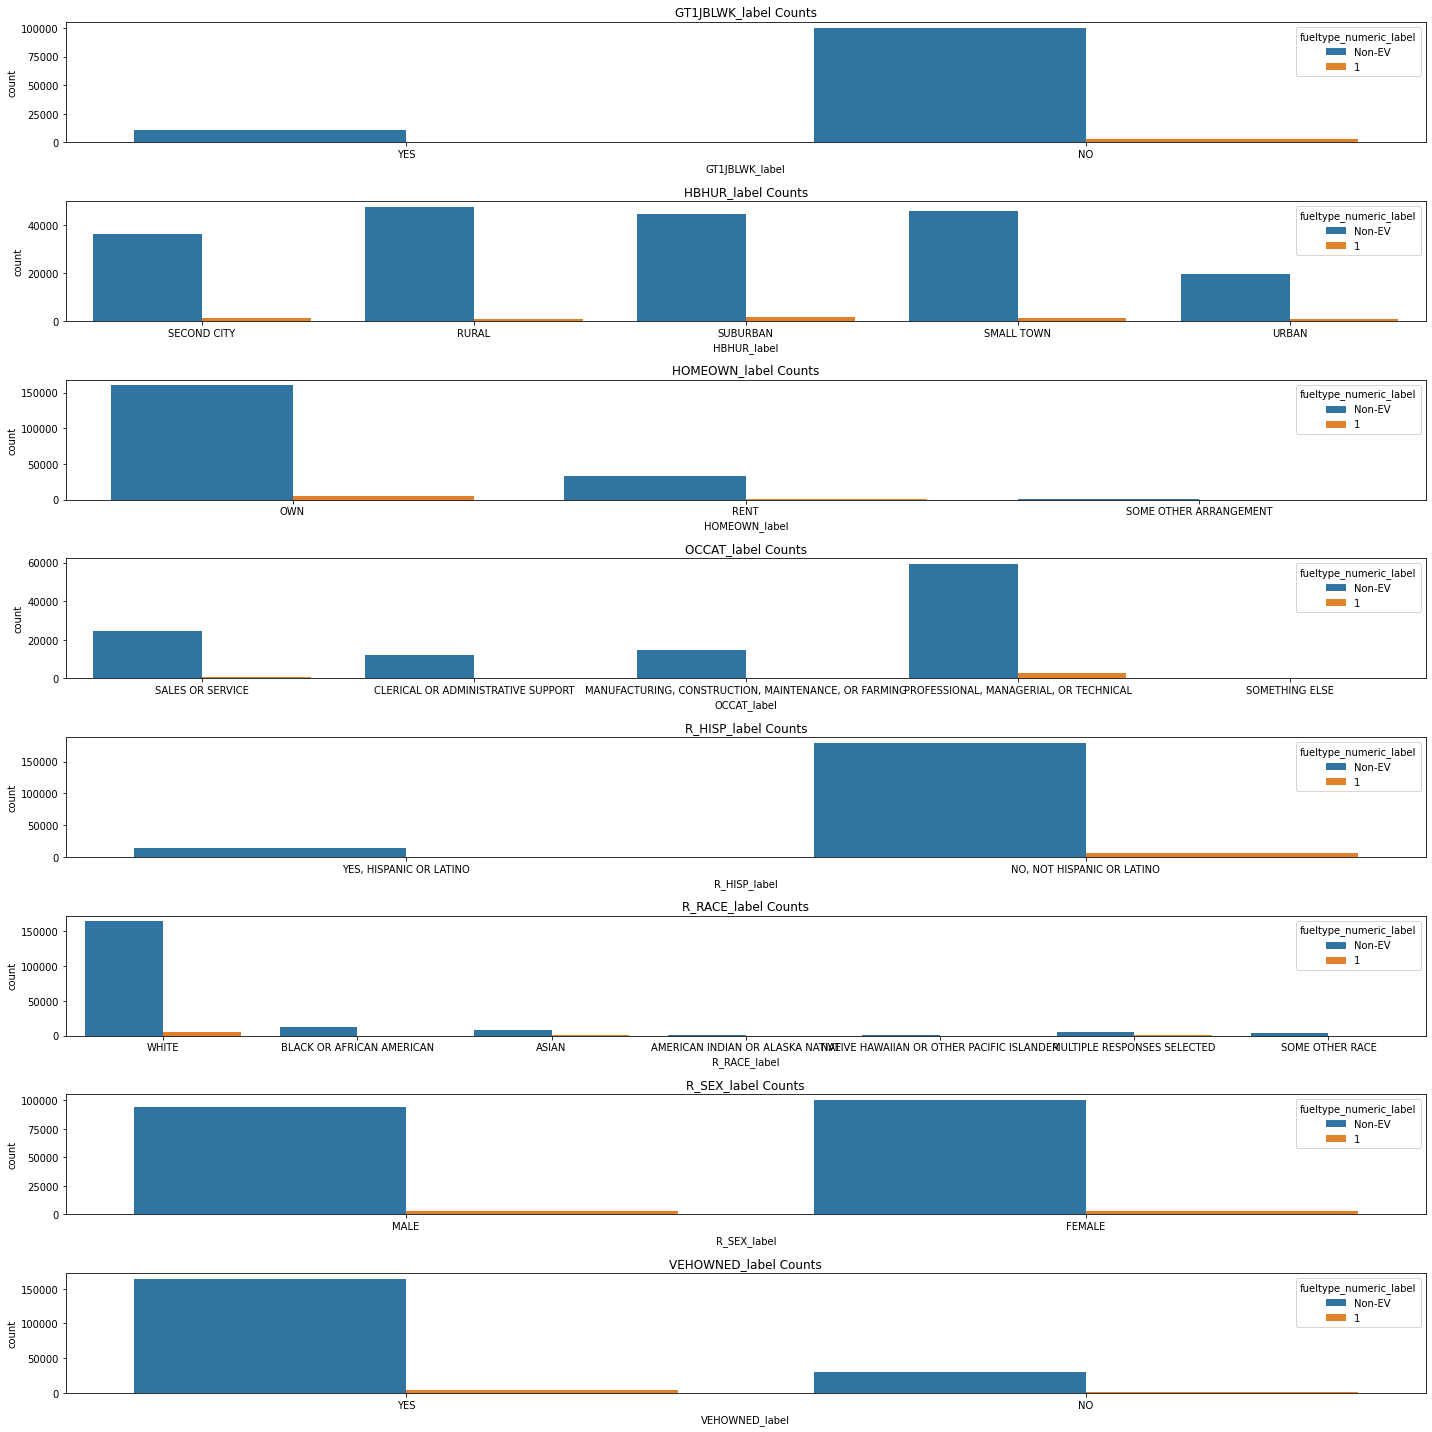

In [26]:
#Check nominal variables with output.
fig, axes =plt.subplots(8,1, figsize=(20,20))

axes = axes.flatten()
for ax, catplot in zip(axes, nominal):
    l = catplot.replace('_label','')
    ordm = list(data[catplot].groupby(data[l]).unique().apply(pd.Series)[0])
    sns.countplot(x=catplot, data=data, ax=ax, hue='fueltype_numeric_label',order = ordm)
    ax.set_title(catplot+" Counts")

plt.tight_layout()  
plt.show()

